## july - 18th
## Assignment-2 concrete strength analysis 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df2 = pd.read_csv(r"/Users/apple/Downloads/Concrete_Data.xls - Sheet1.csv")
df2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [4]:
df2.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
df2.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
df2.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
df2.duplicated().sum()

25

In [8]:
df2.drop_duplicates()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [9]:
df2.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [10]:
df2.rename(columns= {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Furnace slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine aggregate',
       'Concrete compressive strength(MPa, megapascals) ': 'Concrete_csmpa'},errors = 'raise',inplace= True)

In [11]:
df2.select_dtypes(exclude=['object']).columns.tolist()

['Cement',
 'Furnace slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse aggregate',
 'Fine aggregate',
 'Age (day)',
 'Concrete_csmpa']

In [12]:
df2

,Cement,Furnace slag,Fly Ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age (day),Concrete_csmpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [13]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Furnace slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Concrete_csmpa,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [14]:
c = df2.skew(axis = ('columns'))
c

0       1.246379
1       1.269716
2       1.327208
3       1.184687
4       1.274058
          ...   
1025    1.391064
1026    1.246264
1027    1.496724
1028    1.531225
1029    1.388041
Length: 1030, dtype: float64

### Observation 

- No nan values.
- All are numeric variables.




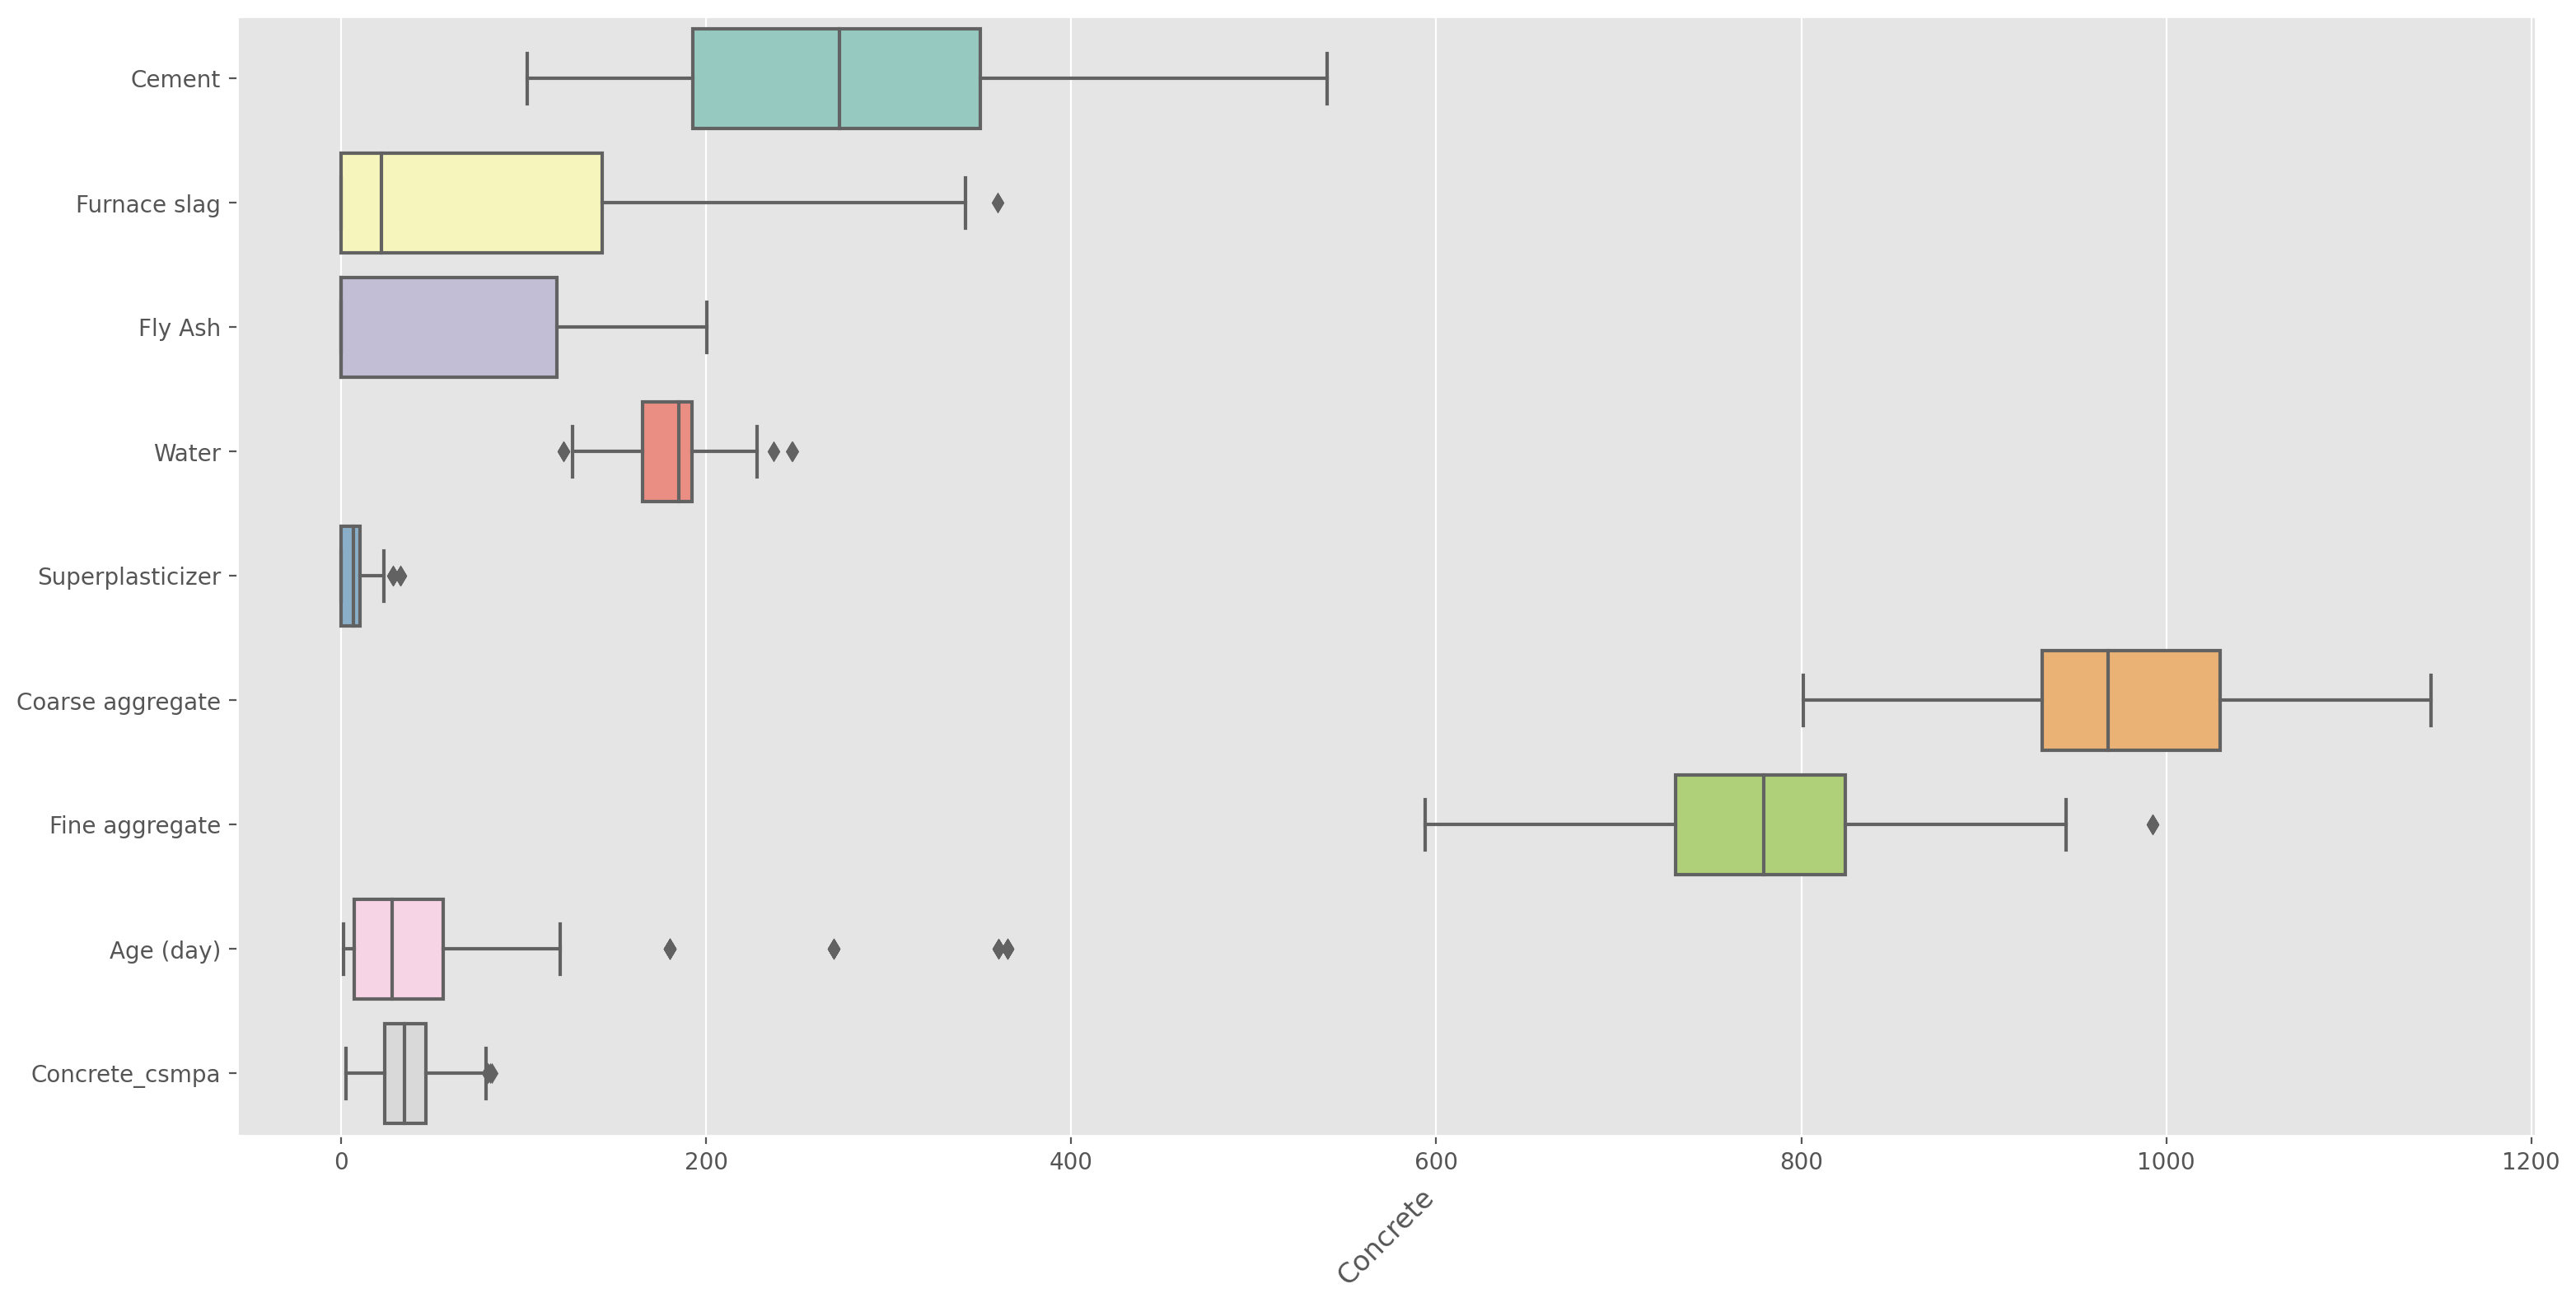

In [15]:
plt.figure(figsize= (18,9),dpi =200)
A = sns.boxplot(data =df2,orient = 'h',palette="Set3")
plt.xlabel('Concrete',rotation = 45)

plt.show()

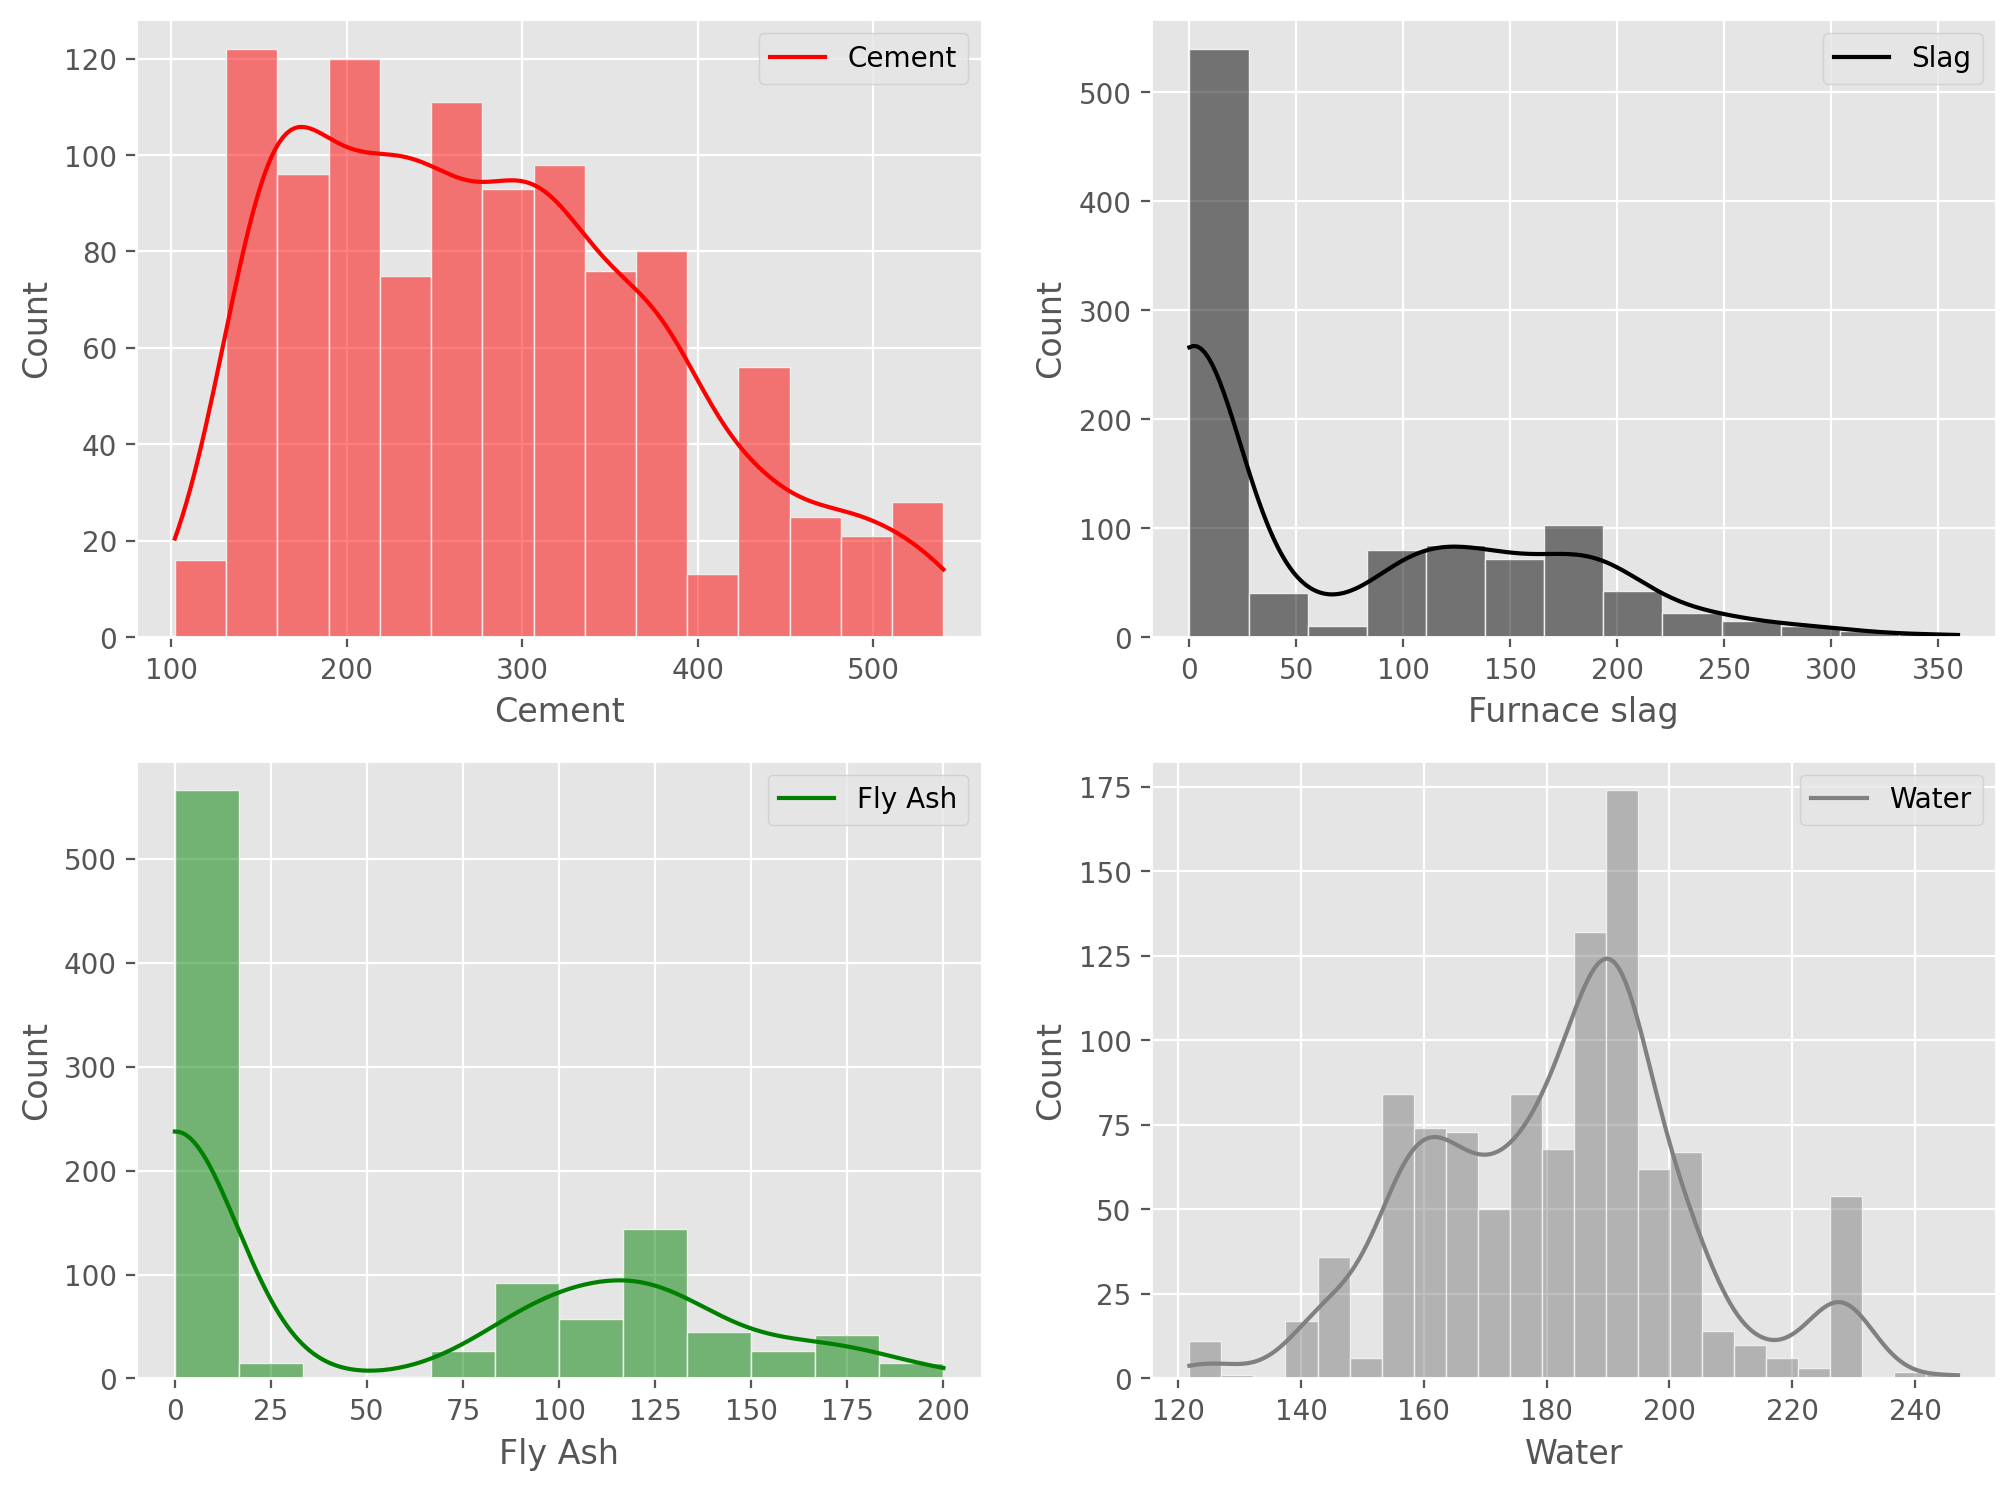

In [16]:
plt.figure(figsize = (12,9),dpi = 200)

plt.subplot(2,2,1)
sns.histplot(df2['Cement'],kde= True,multiple="stack",color="r")
plt.legend(['Cement'])
           
plt.subplot(2,2,2)
sns.histplot(df2['Furnace slag'],kde= True,multiple='fill',color= 'black')
plt.legend(['Slag'])
           
plt.subplot(2,2,3)
sns.histplot(df2['Fly Ash'],kde= True,multiple = 'stack',color= 'green')
plt.legend(['Fly Ash'])

plt.subplot(2,2,4)
sns.histplot(df2['Water'],kde= True,multiple = 'layer',color= 'gray')
plt.legend(['Water'])


plt.show()

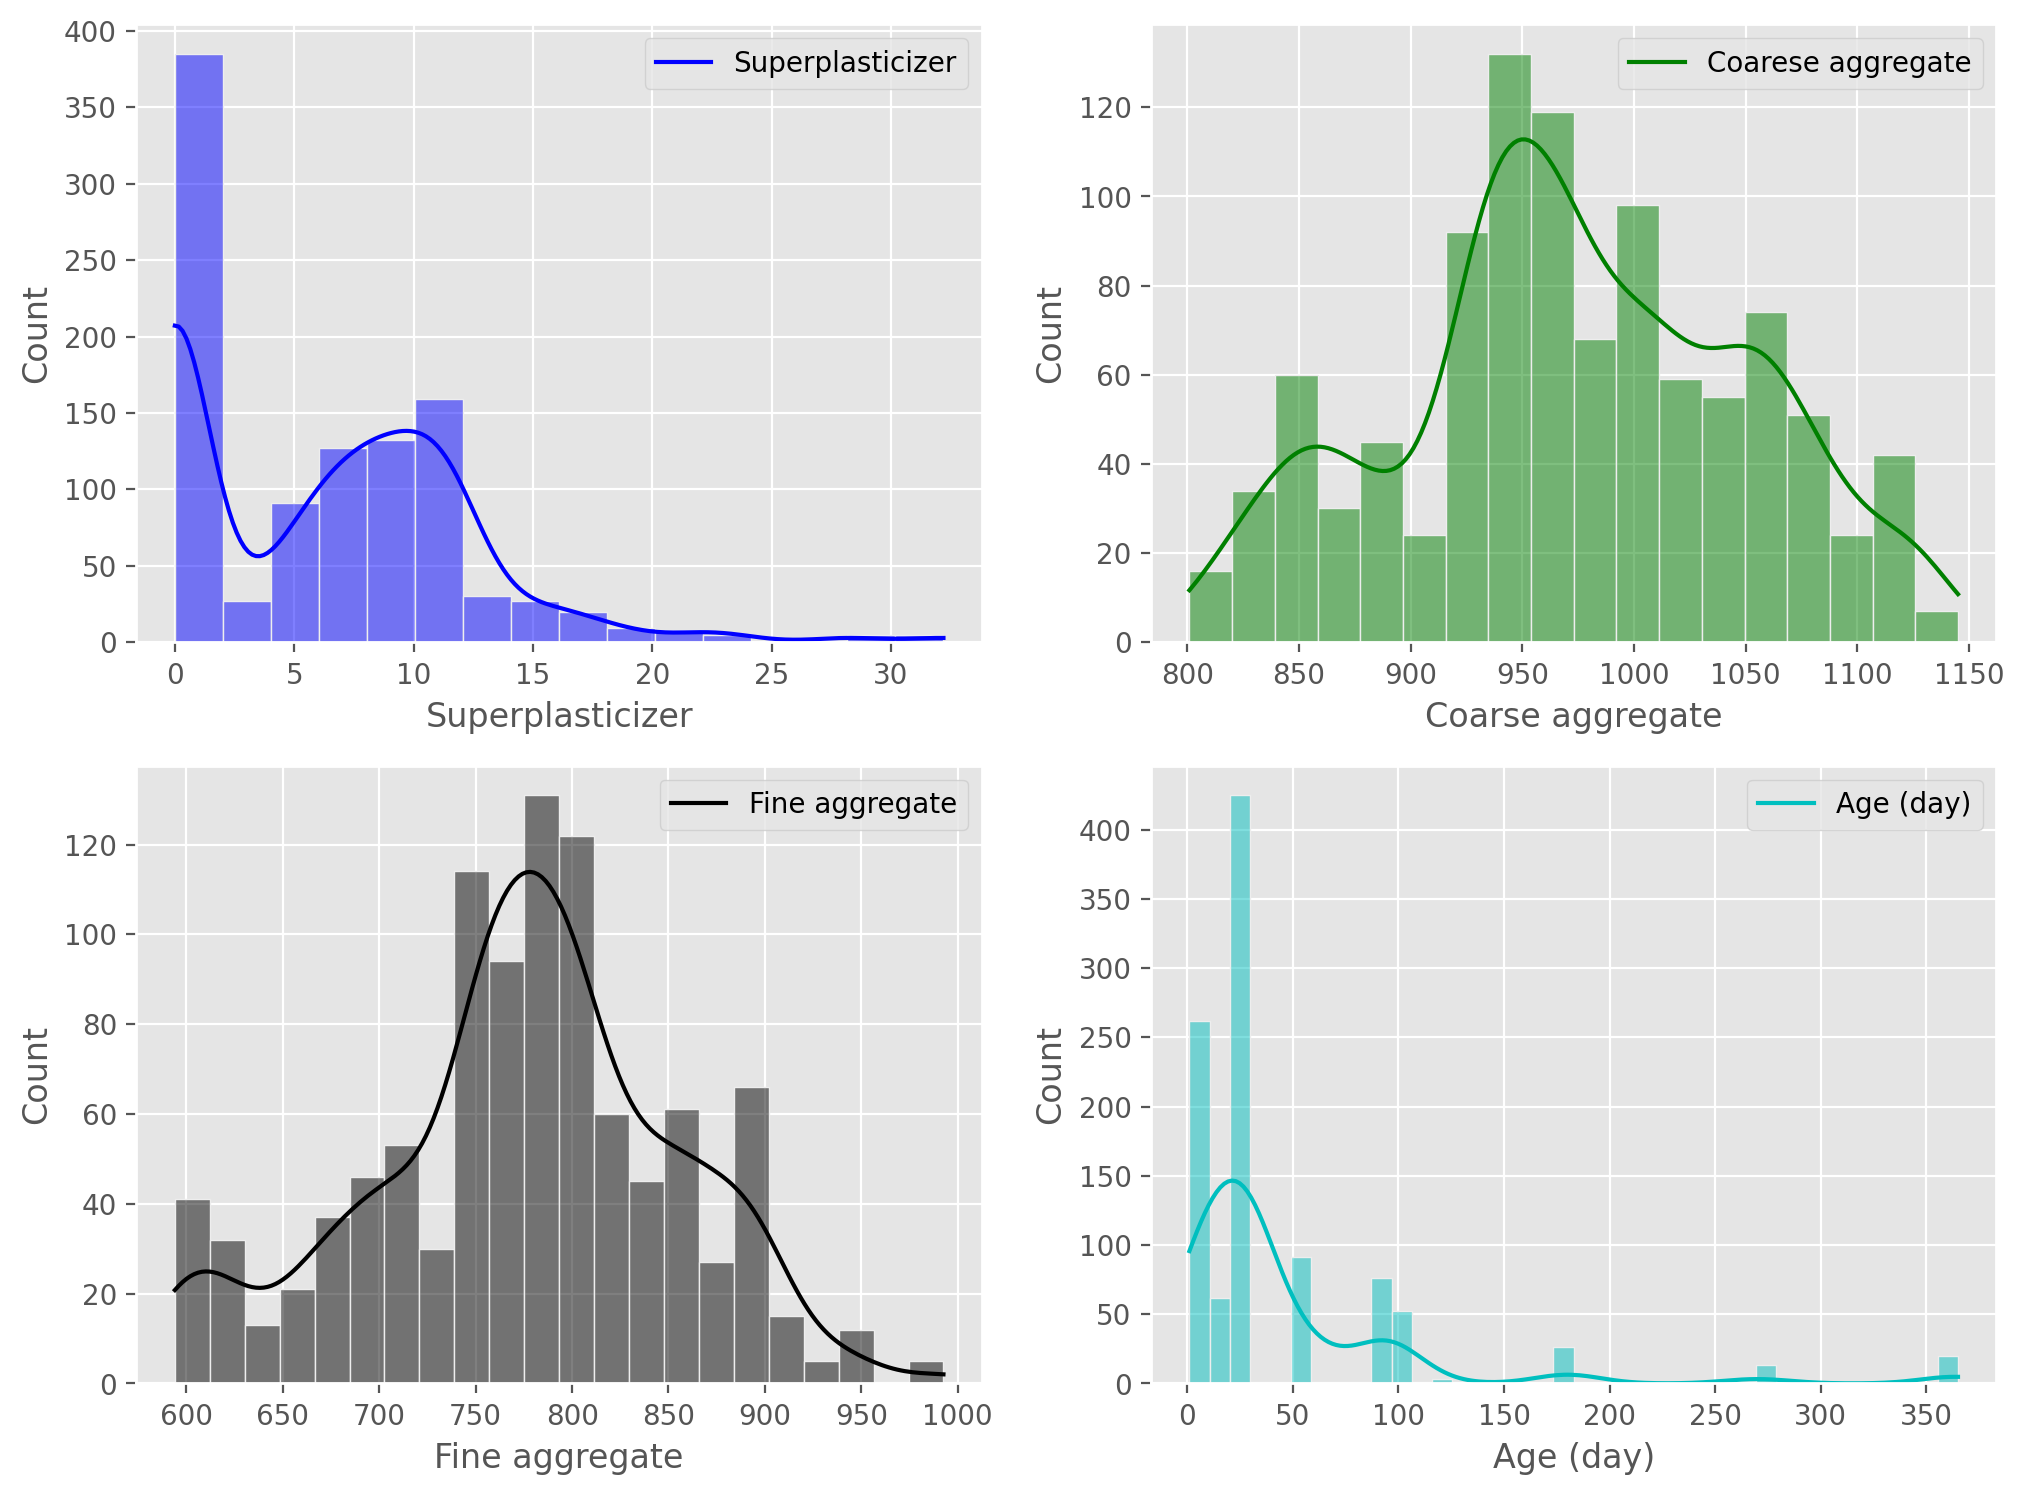

In [17]:
plt.figure(figsize= (12,9),dpi =200)

plt.subplot(2,2,1)
sns.histplot(df2['Superplasticizer'],kde = True,multiple = 'fill',color='Blue')
plt.legend(['Superplasticizer'])

plt.subplot(2,2,2)
sns.histplot(df2['Coarse aggregate'],kde= True,multiple = 'dodge', color= 'green')
plt.legend(['Coarese aggregate'])

plt.subplot(2,2,3)
sns.histplot(df2['Fine aggregate'],kde = True,multiple = 'layer', color= 'Black' )
plt.legend(['Fine aggregate'])

plt.subplot(2,2,4)
sns.histplot(df2['Age (day)'],multiple = 'layer',kde= True, color= 'c')
plt.legend(['Age (day)'])


plt.show()

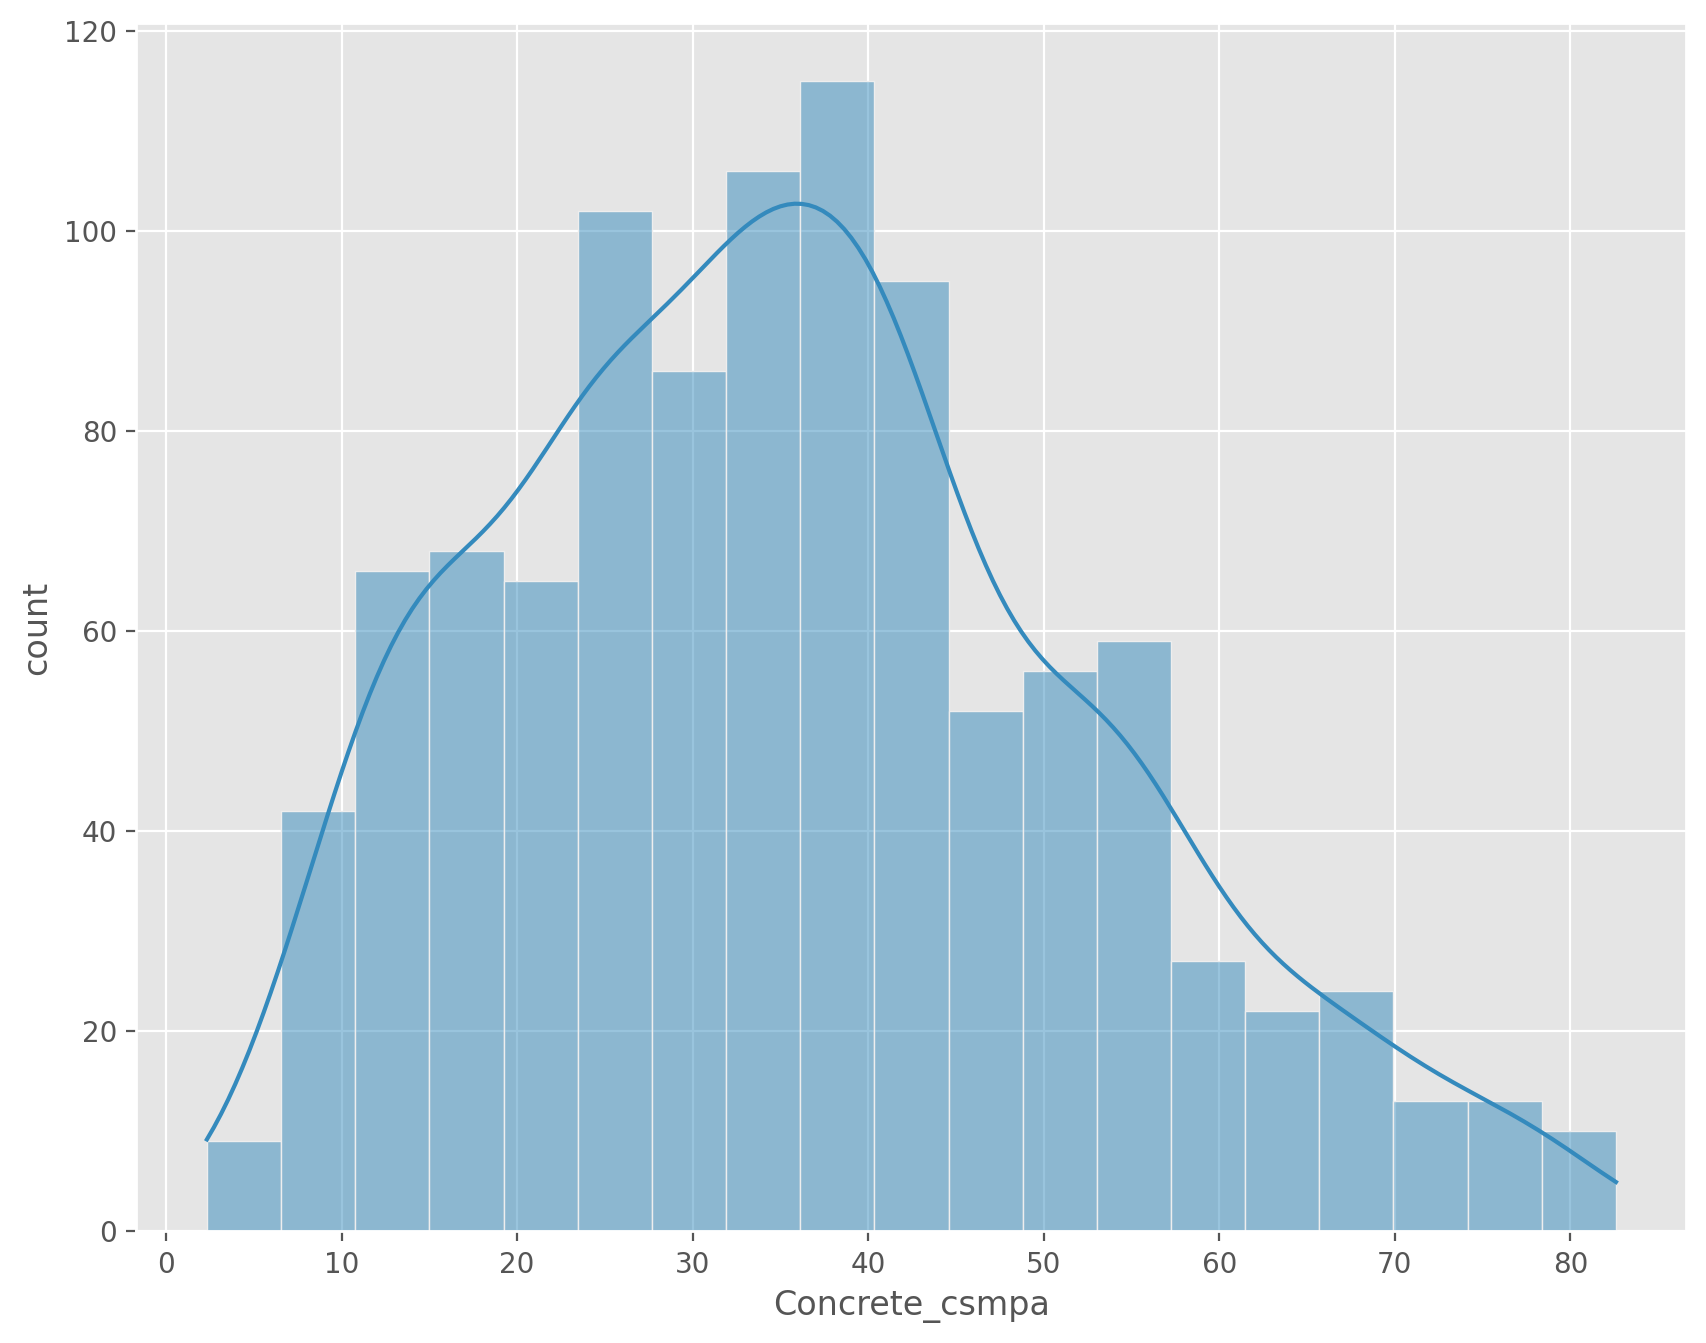

In [18]:
plt.figure(figsize= (10,8),dpi = 200)
sns.histplot(df2['Concrete_csmpa'],kde= True)
plt.ylabel('count')

plt.show()

### skewed of  data

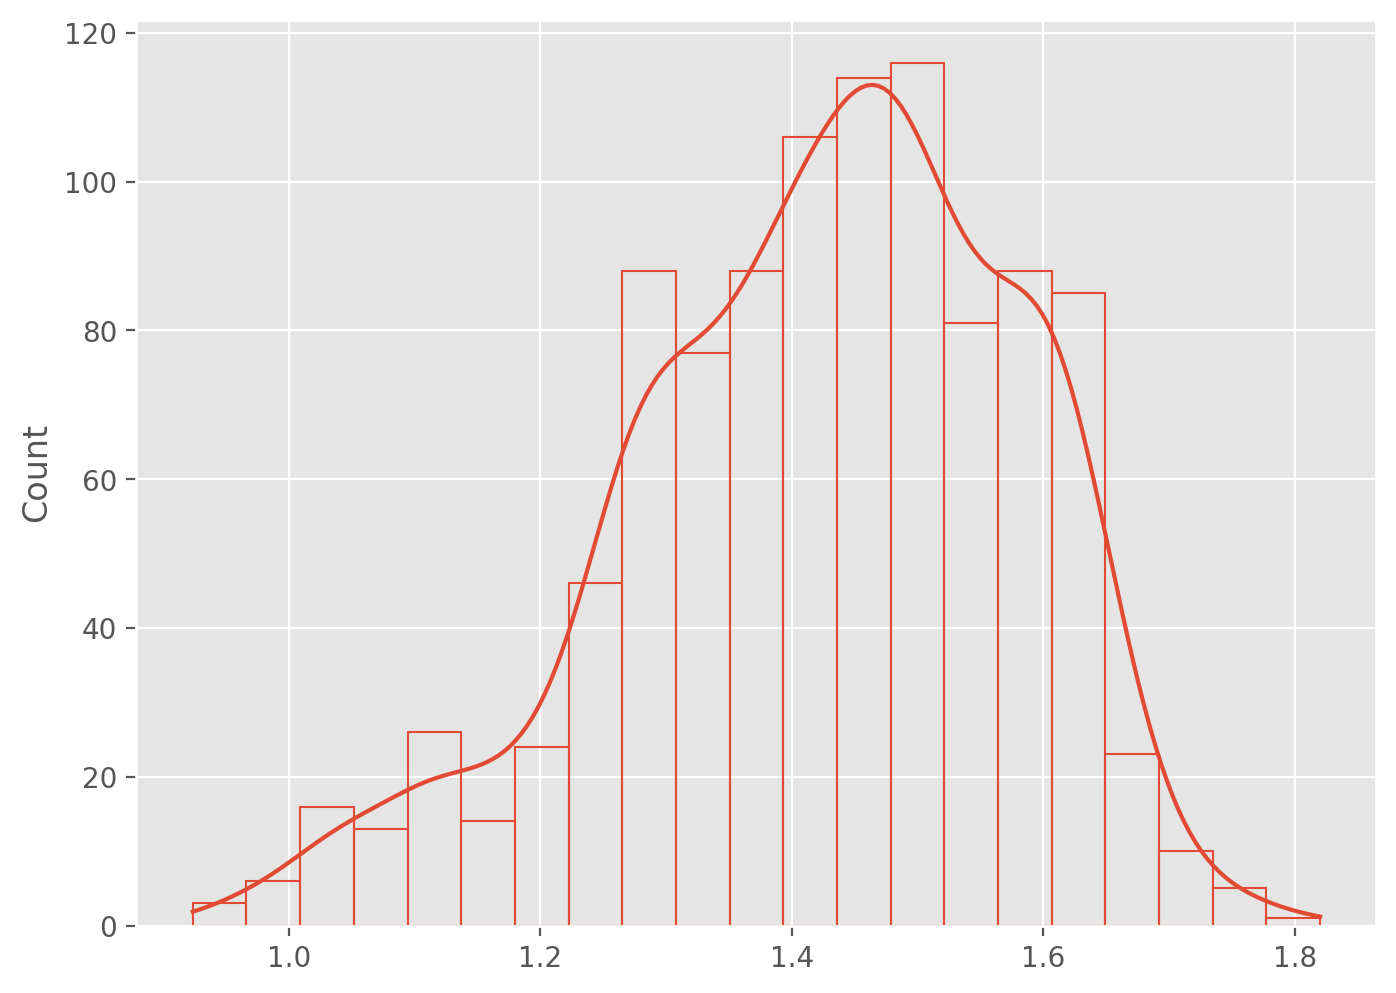

In [19]:
plt.figure(figsize=(8,6),dpi =200)

sns.histplot(df2.skew(axis = ('columns')),kde = True,fill = False)

plt.show()

<Figure size 2400x800 with 0 Axes>

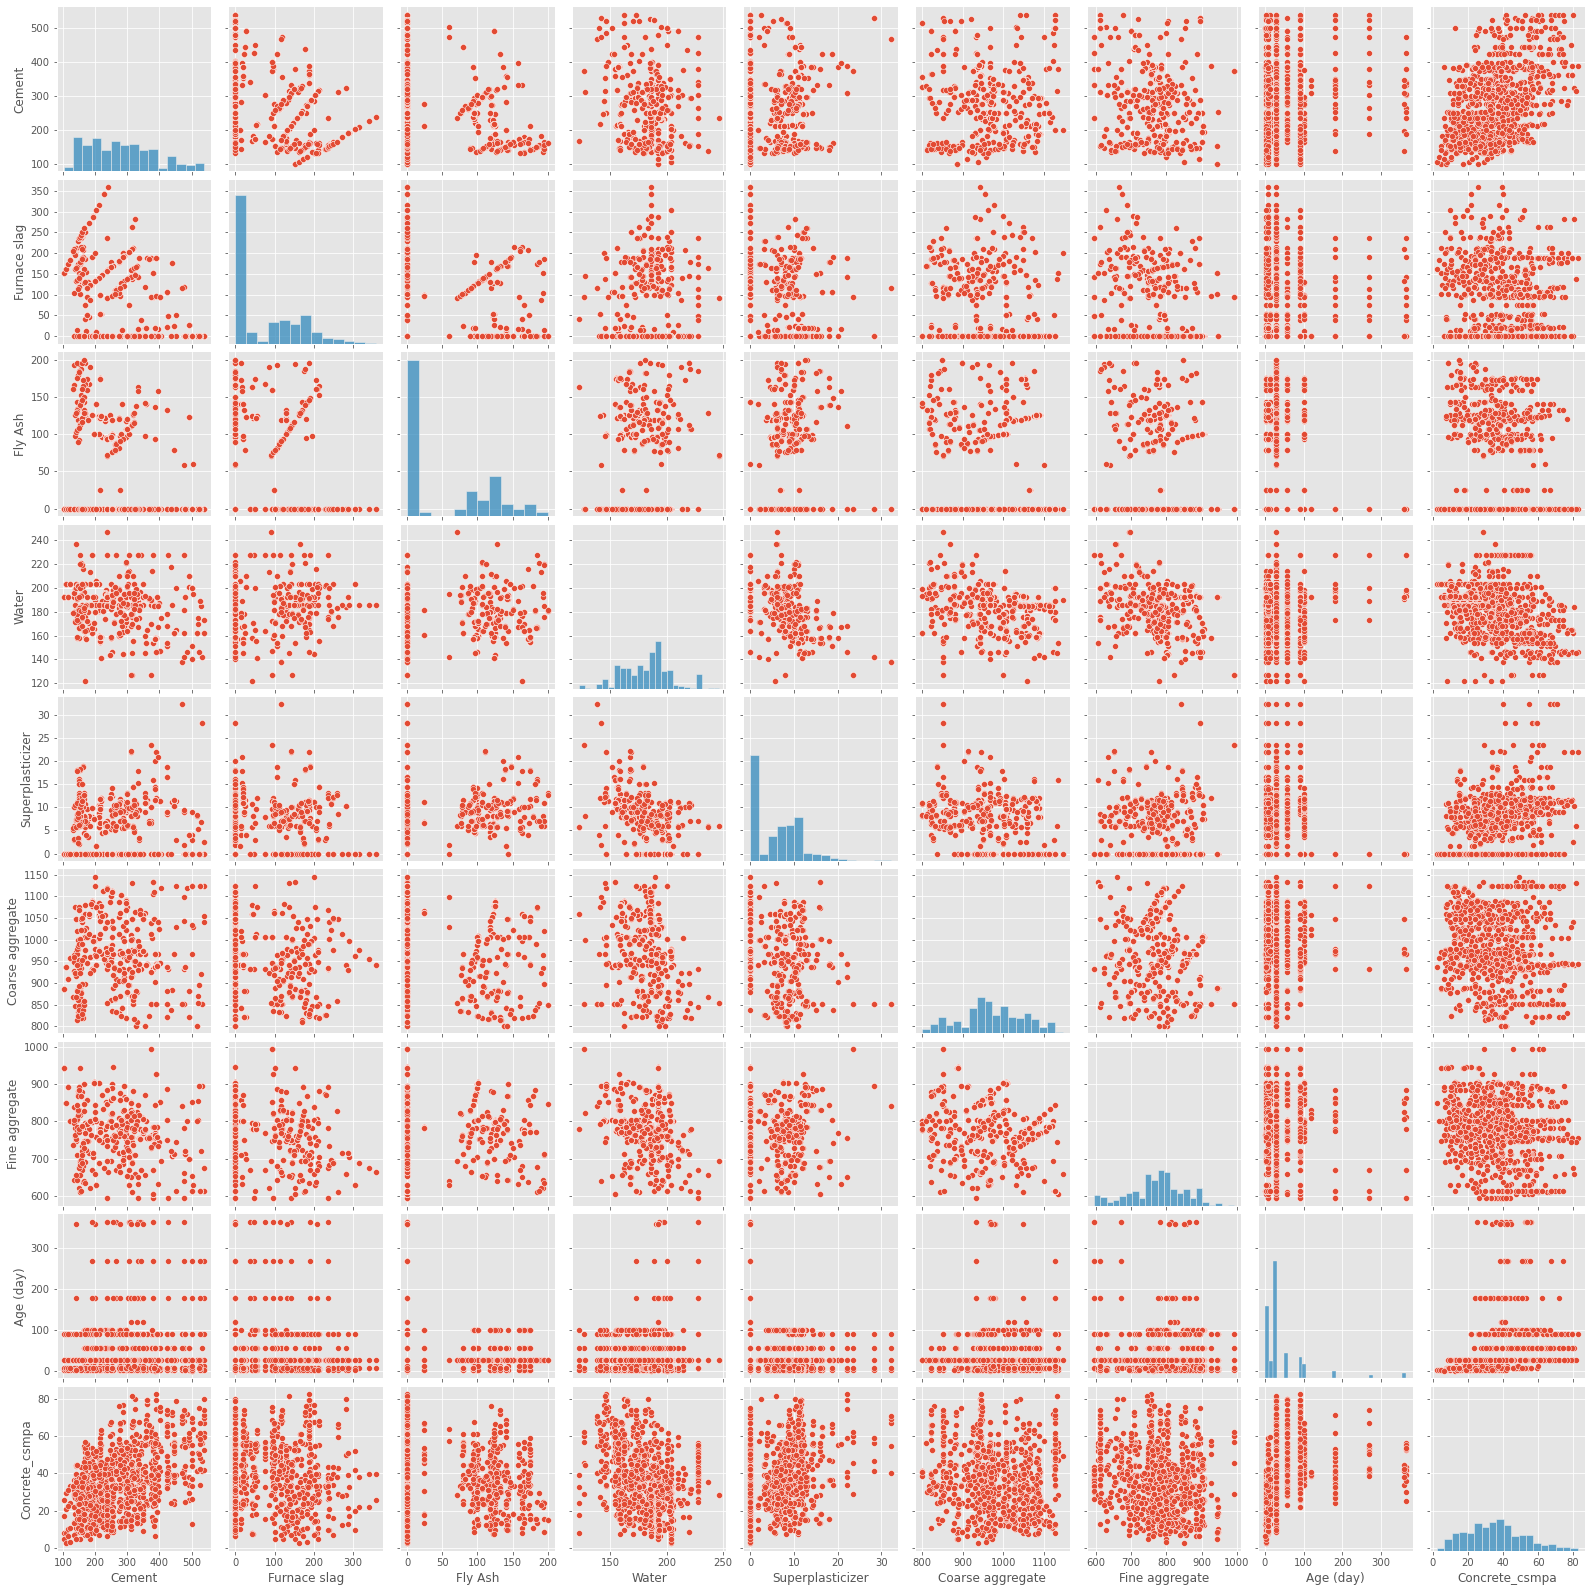

In [20]:
plt.figure(figsize= (12,4),dpi = 200)

sns.pairplot(df2,diag_kind= 'hist')

plt.show()

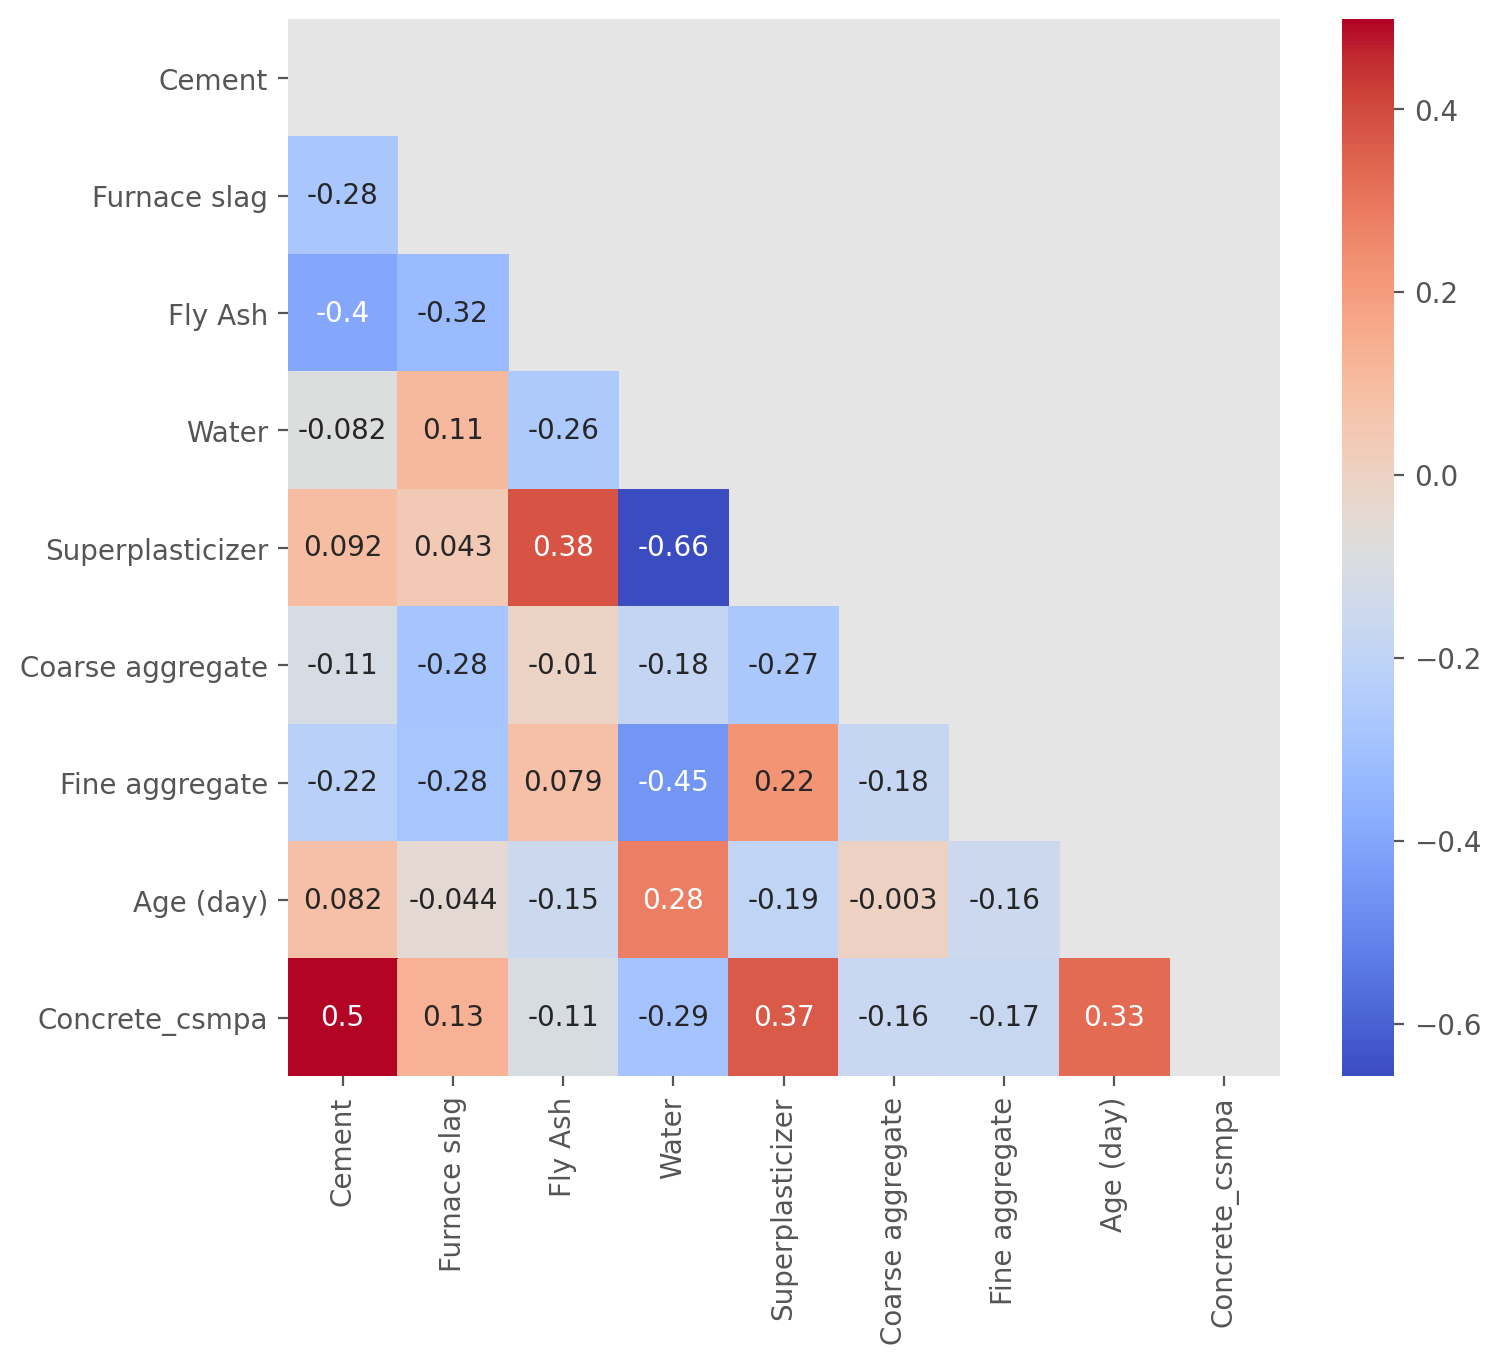

In [21]:
plt.figure(figsize= (8,7),dpi = 200)
mask = np.zeros_like(df2.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df2.corr(),annot= True,mask = mask,cmap="coolwarm")

plt.show()

### Observation 
- Age have huge outliers compared to other features.
- slag, water, superplasticizer,fine aggregate, concrete have minimal outliers.
- Cement,Slag,superplasticizer,Age is positvely corelated with Concrete.
- Water is close to normally distribution.

-- 
* Concrete as negative relation with Ash,Water,Coarse aggregaate,Fine aggregate.
* Concrete is strongly related with cement,slag ,Age, superplasticizer.
* Slag, Ash, fine aggregate, corse aggregate,water are week learners.
------
* cement , concrete_csmpa, superplasticizer ,Age are good learners.
--- 
 * Skewness  is moderate.
 

##### Dealing Outliers !
- what are Outliers?
- how to identify Outliers?
- how to remove outliers?
- why to avoid outliers?


###
- Outliers :- An observation that lies far from other values in random sample from its group.

``````````
- To identify outliers:-
 * we can use describe were we can see the quartile range of feature Q1,Q2,Q3 compare your Q3 with max .
 
* statsical way by using Z-score , observed values(x) - mean of the sample(mew) / standard deviation.

* Visual representation by plotting Box plot and kde plot to find the outliers out of range and the skweness of the curve weather the curve is left skweed or right skweed.  

* Normally distributed if the curve is Bell shaped.


````````
 - Avoiding outliers it helps to fit the model in M.L as our M.L models are sensitive with outliers that helps to make models to give accurate results and prediction.

### Interquartile range

In [22]:
Q1= df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3-Q1
###
IQR_OUTLIERS = df2[((df2 <(Q1- 1.5 * IQR))|(df2>(Q3 + 1.5 *IQR))).any(axis=1)]
IQR_OUTLIERS

,Cement,Furnace slag,Fly Ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age (day),Concrete_csmpa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
...,...,...,...,...,...,...,...,...,...
823,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63


In [23]:
df2= df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [24]:
df2.head()

,Cement,Furnace slag,Fly Ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age (day),Concrete_csmpa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [25]:
df2.tail()

,Cement,Furnace slag,Fly Ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age (day),Concrete_csmpa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


# --------------------------

### Algorithms 
    - Linear regression
	•	Lasso Regression
	•	Ridge Regression
	•	Decision Tree Regressor
	•	Random Forest Regressor
	•	KNN Regressor
	•	SVM Regresso

# Data preprocessing

### M.L

In [26]:
df2.isnull().sum()

Cement              0
Furnace slag        0
Fly Ash             0
Water               0
Superplasticizer    0
Coarse aggregate    0
Fine aggregate      0
Age (day)           0
Concrete_csmpa      0
dtype: int64

In [27]:
df2.duplicated().sum()

25

In [28]:
df2.drop_duplicates()

,Cement,Furnace slag,Fly Ash,Water,Superplasticizer,Coarse aggregate,Fine aggregate,Age (day),Concrete_csmpa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [29]:
df2.drop(['Fly Ash','Coarse aggregate','Fine aggregate'],axis= 1,inplace = True)


In [30]:
x = df2.drop('Concrete_csmpa',axis = 1).values
y = df2['Concrete_csmpa'].values

In [31]:
df2

,Cement,Furnace slag,Water,Superplasticizer,Age (day),Concrete_csmpa
1,540.0,0.0,162.0,2.5,28,61.89
5,266.0,114.0,228.0,0.0,90,47.03
7,380.0,95.0,228.0,0.0,28,36.45
8,266.0,114.0,228.0,0.0,28,45.85
9,475.0,0.0,228.0,0.0,28,39.29
...,...,...,...,...,...,...
1025,276.4,116.0,179.6,8.9,28,44.28
1026,322.2,0.0,196.0,10.4,28,31.18
1027,148.5,139.4,192.7,6.1,28,23.70
1028,159.1,186.7,175.6,11.3,28,32.77


#### Scaling 

In [32]:
### minmax scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(df2)

array([[ 2.59476011, -0.85574028, -0.9935465 , -0.70201309, -0.15331665,
         1.62824512],
       [-0.09589382,  0.46504897,  2.52852016, -1.17034699,  2.01880577,
         0.73218554],
       [ 1.02357533,  0.24491742,  2.52852016, -1.17034699, -0.15331665,
         0.09421042],
       ...,
       [-1.24973265,  0.75933008,  0.64474814, -0.02761229, -0.15331665,
        -0.67461592],
       [-1.14564165,  1.30734176, -0.26778731,  0.94652221, -0.15331665,
        -0.12769396],
       [-0.14597534,  0.30863971,  1.06632885,  0.4407216 , -0.15331665,
        -0.150005  ]])

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state= 4)

In [34]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (658, 5)
Training Labels Shape :  (658,)
Testing Data Shape    :  (283, 5)
Testing Labels Shape  :  (283,)


### Linear regression

In [35]:
## Training the model
# Linear regression

from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(x_train,y_train)

LinearRegression()

In [36]:
Regression.coef_

array([ 0.09130444,  0.06516582, -0.18758861,  0.62415791,  0.30481425])

In [37]:
pred_train = Regression.predict(x_train)
pred_test = Regression.predict(x_test)

In [38]:
print('Score on training data : ', Regression.score(x_train, y_train))
print('Score on testing  data : ', Regression.score(x_test, y_test))

Score on training data :  0.7559102953265092
Score on testing  data :  0.7331732332456748


## Evaluation metrix.

##### r2_score, mean_absolute_error,mean_squared_error

In [39]:
from sklearn.metrics import r2_score
print('Training Data Score : ', r2_score(y_train, pred_train))
print('Testing Data Score  : ', r2_score(y_test, pred_test))

Training Data Score :  0.7559102953265092
Testing Data Score  :  0.7331732332456748


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_test)

0.7331732332456748

#### Root mean squared error.

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred_test, squared = False)

8.480303345535479

In [42]:
12.54 **2

157.25159999999997

######### M.l models
•	Lasso Regression
	•	Ridge Regression
	•	Decision Tree Regressor
	•	Random Forest Regressor
	•	KNN Regressor
	•	SVM Regressor


## Lasso Regression 

In [43]:
from sklearn.linear_model import Lasso
lass_reg = Lasso(alpha=50.0)
lass_reg.fit(x_train,y_train)

Lasso(alpha=50.0)

In [44]:
print('score on training data :', lass_reg.score(x_train,y_train))
print('score on testing data :' ,lass_reg.score(x_test,y_test))

score on training data : 0.692939249834251
score on testing data : 0.6579283736163815


## Ridge regression

In [45]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
ridge_reg.fit(x_train, y_train)

Ridge()

In [46]:
print('score on training data :',ridge_reg.score(x_train,y_train))
print('score on testing data :',ridge_reg.score(x_test,y_test))

score on training data : 0.7559102951498702
score on testing data : 0.733172276777208


## Decision Tree regressor 

In [47]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(max_depth=4)
DTR.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4)

In [48]:
print('Training score:',DTR.score(x_train,y_train))
print('Test score :',DTR.score(x_test,y_test))

Training score: 0.7480531493180016
Test score : 0.6721745217922603


In [49]:
df = pd.DataFrame()
df['Actual_Values'] = y_test.ravel()
df['Predicted_Values'] = pred_test
df.head(20)

,Actual_Values,Predicted_Values
0,14.14,28.687539
1,59.80,51.483803
2,34.29,30.410759
3,25.73,24.192913
4,28.94,24.419962
5,64.02,42.874650
6,24.28,19.608864
7,53.96,41.810859
8,32.04,27.342936
9,33.40,49.618092


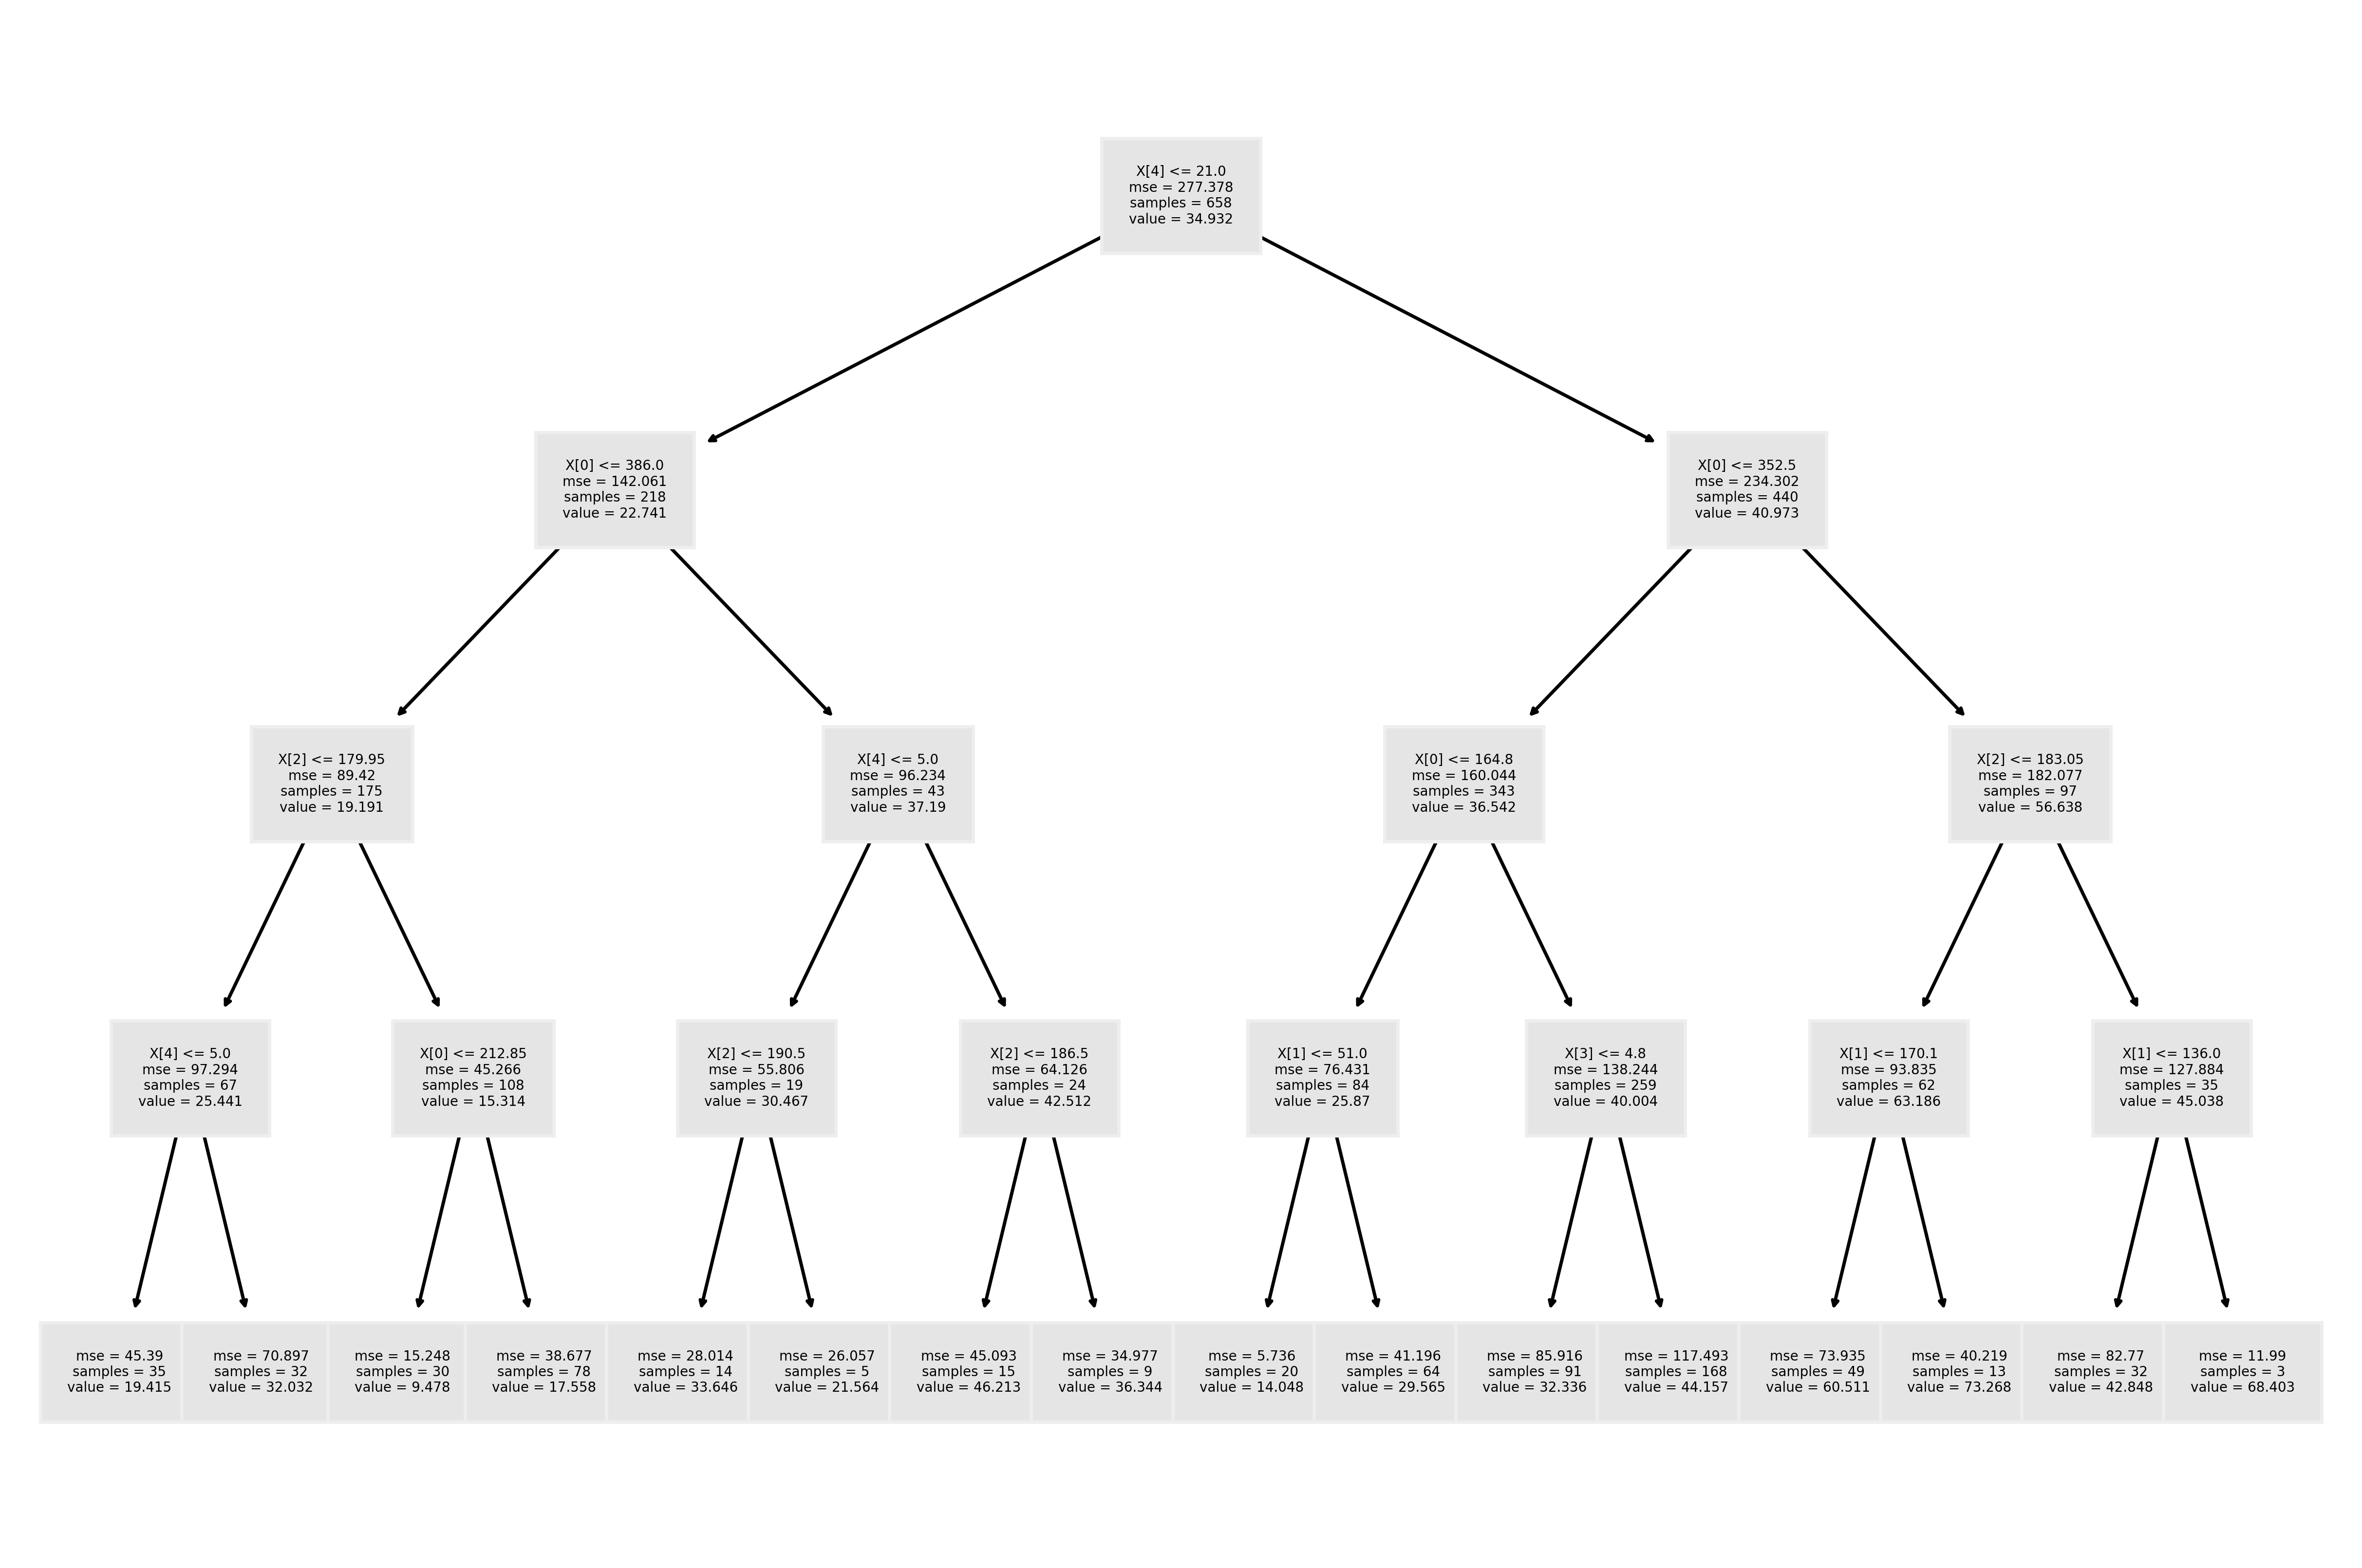

In [50]:
# plot here
from sklearn import tree
plt.figure(dpi = 1000)
tree.plot_tree(DTR, fontsize = 5)
plt.show()

## Random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [52]:
print('Training score :', RFR.score(x_train,y_train))
print('Test score :', RFR.score(x_test,y_test))

Training score : 0.9829079563086272
Test score : 0.9032302161973685


#### knn regressor 

In [53]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=2)

In [54]:
print('Training score :', KNN.score(x_train,y_train))
print('Test score :', KNN.score(x_test,y_test))

Training score : 0.9367618643250083
Test score : 0.8003917237718696


### svm regressor

In [55]:
from sklearn.svm import SVR
sv = SVR(C=1.0, epsilon=0.2)
sv.fit(x_train,y_train)

SVR(epsilon=0.2)

In [56]:
print('Training score:', sv.score(x_train,y_train))
print('Test score:',sv.score(x_test,y_test))

Training score: 0.5711687901555188
Test score: 0.5337121254558616


#### Hyperparameter Tunning 

In [57]:
from sklearn.model_selection import GridSearchCV

In [61]:
Model = SVR()

param_grid=dict()
# GridSearchModel to obtain the best parameter
GridSearchModel = GridSearchCV(Model,param_grid=param_grid,cv= 5,return_train_score=True)

# fit (train) the model
GridSearchModel.fit(x_train,y_train)

# Showing Results
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)

Best Score is : 0.5131638910563512
Best Parameters are : {}


In [62]:
best_model = GridSearchModel.best_estimator_
GridSearchModel.fit(x_train,y_train)

print('train:',best_model.score(x_train,y_train))
print('train:', best_model.score(x_test,y_test))

train: 0.5728585514823551
train: 0.5354847197186641


-----------------------